In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import os
import re
import pathlib
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore') 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
plt.rc('font', family='NanumBarunGothic') #set font
plt.rc('axes', unicode_minus=False)

## Feature Data

In [ ]:
feature_df = pd.read_csv('/content/gdrive/MyDrive/SolarPower/FeatureData.csv')
feature_df.drop(columns= ['지점명','년도'], inplace=True)
feature_df['일자'] = pd.to_datetime(feature_df['일자'])
feature_df

,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,일자,지역,PM10,PM25
0,4.3,NaN,4.1,290.0,45.0,1026.8,NaN,NaN,NaN,3870.0,0,2017-01-01,강원 강릉시,58.0,46.0
1,-2.4,NaN,0.0,0.0,85.0,1030.4,NaN,NaN,NaN,720.0,0,2017-01-01,경남 진주시,79.0,NaN
2,4.3,NaN,5.1,290.0,46.0,1027.2,NaN,NaN,NaN,3874.0,1,2017-01-01,강원 강릉시,63.0,51.0
3,-3.0,NaN,0.1,0.0,86.0,1030.1,NaN,NaN,NaN,700.0,1,2017-01-01,경남 진주시,58.0,NaN
4,4.4,NaN,4.4,290.0,44.0,1027.0,NaN,NaN,NaN,4019.0,2,2017-01-01,강원 강릉시,63.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131459,-2.0,NaN,8.2,360.0,61.0,1034.0,NaN,NaN,5.0,2000.0,19,2019-12-31,전남 목포시,17.0,7.0
131460,-2.8,NaN,4.6,20.0,65.0,1033.9,NaN,NaN,7.0,2000.0,20,2019-12-31,전남 목포시,13.0,6.0
131461,-2.8,NaN,3.3,20.0,65.0,1033.9,NaN,NaN,9.0,2000.0,21,2019-12-31,전남 목포시,17.0,8.0
131462,-2.6,NaN,4.7,20.0,63.0,1033.5,NaN,NaN,9.0,2000.0,22,2019-12-31,전남 목포시,13.0,5.0


## Solar Power Generation

In [ ]:
def Sundata_Map(filename):
  path = f'/content/gdrive/MyDrive/SolarPower/Solardata/{filename}/'
  file_list = os.listdir(path)

  result_df = pd.DataFrame()
  for i in file_list:
    df = pd.read_csv(path+i, encoding='CP949')
    df['년도'] = pd.to_datetime(df['년월일']).dt.year
    result_df = pd.concat([result_df, df], axis=0)
  result_df.drop(columns=['호기', '구분', '총량', '평균', '최대', '최소', '최대(시간별)', '최소(시간별)'], inplace=True)  
  return result_df

In [ ]:
Jj_df = Sundata_Map('Jinjo')
Jj_df['지역'] = '경남 진주시'
Jj_df.head()

,년월일,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,년도,지역
0,2020-07-01,0.0,0.0,0.0,0.0,5.0,34.0,87.0,104.0,180.0,...,30.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,2020,경남 진주시
1,2020-07-02,0.0,0.0,0.0,0.0,5.0,31.0,81.0,119.0,196.0,...,42.0,20.0,4.0,0.0,0.0,0.0,0.0,0.0,2020,경남 진주시
2,2020-07-03,0.0,0.0,0.0,0.0,4.0,16.0,24.0,34.0,41.0,...,17.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,2020,경남 진주시
3,2020-07-04,0.0,0.0,0.0,0.0,2.0,18.0,69.0,101.0,117.0,...,8.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,2020,경남 진주시
4,2020-07-05,0.0,0.0,0.0,0.0,5.0,16.0,38.0,45.0,51.0,...,49.0,19.0,7.0,0.0,0.0,0.0,0.0,0.0,2020,경남 진주시


In [ ]:
Gn_df = Sundata_Map('Gangneung')
Gn_df['지역'] = '강원 강릉시'
Gn_df.head()

,년월일,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,년도,지역
0,2020-07-01,0.0,0.0,0.0,0.0,0.0,0.000,0.000,7.008,53.376,...,292.512,155.424,789.888,190.464,2.688,0.000,0.000,0.0,2020,강원 강릉시
1,2020-07-02,0.0,0.0,0.0,0.0,0.0,1.824,19.104,67.680,202.848,...,378.432,263.424,783.168,695.040,687.456,151.584,0.288,0.0,2020,강원 강릉시
2,2020-07-03,0.0,0.0,0.0,0.0,0.0,0.192,25.440,75.264,189.984,...,349.632,154.080,727.488,693.312,109.824,1.440,0.000,0.0,2020,강원 강릉시
3,2020-07-04,0.0,0.0,0.0,0.0,0.0,0.000,22.752,93.024,163.392,...,242.208,146.016,781.536,697.920,688.320,152.256,0.480,0.0,2020,강원 강릉시
4,2020-07-05,0.0,0.0,0.0,0.0,0.0,2.496,26.304,79.296,217.824,...,364.320,249.024,758.688,693.984,643.872,31.872,0.000,0.0,2020,강원 강릉시


In [ ]:
def Sundata_Mokpo(filename):
  path = f'/content/gdrive/MyDrive/SolarPower/Solardata/{filename}/'
  file_list = os.listdir(path)

  result_df = pd.DataFrame()
  for i in file_list:
    df = pd.read_csv(path+i, encoding='CP949')
    year = i[-8:-4]
    df['년도'] = np.int(year)
    df.dropna(how='all', axis=1, inplace=True)

    #년도 별로 다른 데이터 열 이름 맞추기
    cols = [x for x in df.columns if x not in [' 계 ','년도','월','일']]
    for i in cols:
      rname = re.sub(r'[^0-9]',"",i)
      df.rename(columns = {i:np.str(np.int(rname))}, inplace=True)
    result_df = pd.concat([result_df, df], axis=0)
  result_df.drop(columns=' 계 ', inplace=True)
  return result_df

In [ ]:
Ya_df = Sundata_Mokpo('Yeongam')
Ya_df['지역'] = '전남 목포시'
Ya_df.head()

,월,일,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,년도,지역
0,1,1,0,0,0,0,0,0.0,0.0,0.00,...,69.48,2.88,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시
1,1,2,0,0,0,0,0,0.0,0.0,0.24,...,69.84,10.20,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시
2,1,3,0,0,0,0,0,0.0,0.0,0.24,...,103.20,12.72,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시
3,1,4,0,0,0,0,0,0.0,0.0,0.24,...,94.08,9.24,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시
4,1,5,0,0,0,0,0,0.0,0.0,0.00,...,64.92,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시


In [ ]:
Ya_df['년월일'] = Ya_df['년도'].astype(str) + f'-' + Ya_df['월'].astype(str) + f'-' + Ya_df['일'].astype(str)
Ya_df.drop(columns=['월','일'],inplace=True)
Ya_df.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,년도,지역,년월일
0,0,0,0,0,0,0.0,0.0,0.00,5.28,139.20,...,2.88,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시,2015-1-1
1,0,0,0,0,0,0.0,0.0,0.24,57.36,224.88,...,10.20,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시,2015-1-2
2,0,0,0,0,0,0.0,0.0,0.24,57.00,319.80,...,12.72,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시,2015-1-3
3,0,0,0,0,0,0.0,0.0,0.24,57.36,275.88,...,9.24,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시,2015-1-4
4,0,0,0,0,0,0.0,0.0,0.00,50.28,152.88,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2015,전남 목포시,2015-1-5


In [ ]:
print('강릉 : ', Gn_df['년도'].unique())
print('진주 : ', Jj_df['년도'].unique())
print('목포 : ', Ya_df['년도'].unique())

강릉 :  [2020 2019 2018 2017]
진주 :  [2020 2019 2017 2018]
목포 :  [2015 2014 2017 2018 2013 2016 2019]


In [ ]:
Sundata = pd.concat([Jj_df, Gn_df, Ya_df])
Sundata.to_csv('/content/gdrive/MyDrive/SolarPower/solardata.csv', index=None)
print(Sundata.shape)
Sundata.head(3)

(5403, 27)


,년월일,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,년도,지역
0,2020-07-01,0.0,0.0,0.0,0.0,5.0,34.0,87.0,104.0,180.0,...,30.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,2020,경남 진주시
1,2020-07-02,0.0,0.0,0.0,0.0,5.0,31.0,81.0,119.0,196.0,...,42.0,20.0,4.0,0.0,0.0,0.0,0.0,0.0,2020,경남 진주시
2,2020-07-03,0.0,0.0,0.0,0.0,4.0,16.0,24.0,34.0,41.0,...,17.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,2020,경남 진주시


In [ ]:
def MakeDate(df, date, cols):
  data = df.copy()
  data = data.melt(id_vars= cols , var_name='시간', value_name='발전량')
  data['시간'] = data['시간'].astype(int)
  data.sort_values(['년월일','시간'], inplace=True)
  data.reset_index(drop=True, inplace=True)
  return data

In [ ]:
Solardata = MakeDate(Sundata, '년월일', ['년월일','지역','년도'])
Solardata['일자'] =  pd.to_datetime(Solardata['년월일'])
Solardata.drop(columns= ['년월일','년도'], inplace=True)
Solardata

,지역,시간,발전량,일자
0,전남 목포시,1,0.000,2013-01-01
1,전남 목포시,2,0.000,2013-01-01
2,전남 목포시,3,0.000,2013-01-01
3,전남 목포시,4,0.000,2013-01-01
4,전남 목포시,5,0.000,2013-01-01
...,...,...,...,...
129667,강원 강릉시,20,342.336,2020-12-31
129668,강원 강릉시,21,664.800,2020-12-31
129669,강원 강릉시,22,692.736,2020-12-31
129670,강원 강릉시,23,139.008,2020-12-31


## Mapping

In [ ]:
print(Solardata[Solardata['시간'] == 24]['발전량'].unique())
Solardata[Solardata['시간'] == 24]

[0.      nan 1.056 2.016 1.92  1.824 2.208 2.496 2.592 2.88  3.072 2.688
 0.96  2.304 0.672 2.784 1.632 3.456 3.168 0.288 1.44  2.976 3.264 3.36
 3.744 2.112 3.84  4.32  3.648 4.416 4.224 1.248 4.512 4.608]


,지역,시간,발전량,일자
23,전남 목포시,24,0.000,2013-01-01
47,전남 목포시,24,0.000,2013-01-10
71,전남 목포시,24,0.000,2013-01-11
95,전남 목포시,24,0.000,2013-01-12
119,전남 목포시,24,0.000,2013-01-13
...,...,...,...,...
129575,강원 강릉시,24,4.512,2020-12-27
129599,강원 강릉시,24,4.608,2020-12-28
129623,강원 강릉시,24,4.512,2020-12-29
129647,강원 강릉시,24,4.608,2020-12-30


In [ ]:
night_data = Solardata[Solardata['시간'] == 24]['발전량'].unique()
for num in night_data:
  small_df = Solardata[(Solardata['시간'] == 24) & (Solardata['발전량'] == num)]
  print(num,' : ',len(small_df))

0.0  :  5301
nan  :  0
1.056  :  2
2.016  :  4
1.92  :  2
1.824  :  2
2.208  :  2
2.496  :  5
2.592  :  2
2.88  :  4
3.072  :  6
2.688  :  3
0.96  :  2
2.304  :  2
0.672  :  2
2.784  :  4
1.632  :  1
3.456  :  5
3.168  :  9
0.288  :  1
1.44  :  1
2.976  :  3
3.264  :  4
3.36  :  4
3.744  :  2
2.112  :  3
3.84  :  1
4.32  :  5
3.648  :  2
4.416  :  2
4.224  :  2
1.248  :  1
4.512  :  4
4.608  :  5


In [ ]:
for i in range(len(Solardata)):  #매핑하기 위해서 시간이 0-23범위가 되게 24를 0시간으로 변경
  if Solardata['시간'][i] == 24: #나중에 밤에 측정된 데이터는 테스트에 사용되지 않기에 임의의 숫자로 변경함
    Solardata['시간'][i] = 0
Solardata.sort_values(['일자','시간','지역'], inplace=True)
Solardata.reset_index(drop=True, inplace=True)
Solardata.head()

,지역,시간,발전량,일자
0,전남 목포시,0,0.0,2013-01-01
1,전남 목포시,1,0.0,2013-01-01
2,전남 목포시,2,0.0,2013-01-01
3,전남 목포시,3,0.0,2013-01-01
4,전남 목포시,4,0.0,2013-01-01


In [ ]:
feature_df.sort_values(['일자','시간','지역'], inplace=True)
feature_df.reset_index(drop=True, inplace=True)
feature_df.head()

,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,일자,지역,PM10,PM25
0,-2.0,NaN,4.1,160.0,93.0,1021.4,NaN,NaN,3.0,2000.0,0,2013-01-01,전남 목포시,135.0,NaN
1,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,1,2013-01-01,전남 목포시,44.0,NaN
2,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,2,2013-01-01,전남 목포시,34.0,NaN
3,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,3,2013-01-01,전남 목포시,41.0,NaN
4,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,4,2013-01-01,전남 목포시,41.0,NaN


In [ ]:
print(Solardata.shape)
print(feature_df.shape)

(129672, 4)
(131464, 15)


In [ ]:
Solardata['지역'].unique()

array(['전남 목포시', '강원 강릉시', '경남 진주시'], dtype=object)

In [ ]:
Map_df= pd.merge(Solardata, feature_df, on=['일자','시간','지역'])
Map_df

,지역,시간,발전량,일자,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,PM10,PM25
0,전남 목포시,0,0.000,2013-01-01,-2.0,NaN,4.1,160.0,93.0,1021.4,NaN,NaN,3.0,2000.0,135.0,NaN
1,전남 목포시,1,0.000,2013-01-01,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,44.0,NaN
2,전남 목포시,2,0.000,2013-01-01,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,34.0,NaN
3,전남 목포시,3,0.000,2013-01-01,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,41.0,NaN
4,전남 목포시,4,0.000,2013-01-01,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,41.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129659,강원 강릉시,19,320.352,2020-12-31,-4.0,NaN,5.4,230.0,40.0,1020.0,NaN,NaN,0.0,4333.0,22.0,NaN
129660,강원 강릉시,20,342.336,2020-12-31,-4.3,NaN,6.4,230.0,41.0,1020.4,NaN,NaN,0.0,4853.0,24.0,NaN
129661,강원 강릉시,21,664.800,2020-12-31,-4.8,NaN,5.0,230.0,43.0,1021.3,NaN,NaN,0.0,3707.0,21.0,NaN
129662,강원 강릉시,22,692.736,2020-12-31,-4.9,NaN,5.3,230.0,42.0,1021.6,NaN,NaN,2.0,4694.0,32.0,NaN


## Solar Power plot

In [ ]:
Sundata.describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,년도
count,5403.000000,5403.0,5403.0,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,...,5403.000000,5403.000000,5402.000000,5402.000000,5402.000000,5402.000000,5400.000000,5397.000000,5398.000000,5403.000000
mean,0.000373,0.0,0.0,0.000370,0.228478,2.035577,16.657814,68.581304,180.091067,326.230123,...,349.474746,218.302242,94.670120,44.032235,20.623034,19.455408,12.776782,2.594917,0.053264,2017.297057
std,0.010361,0.0,0.0,0.027209,1.125086,6.303720,27.899704,80.079750,167.260860,262.547852,...,310.066399,220.238298,122.504081,114.387206,100.003291,103.952337,84.728717,24.588297,0.416565,2.011731
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000
25%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.292000,54.060000,115.000000,...,59.700000,28.960000,2.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.152000,40.000000,123.000000,264.960000,...,269.760000,119.760000,24.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
75%,0.000000,0.0,0.0,0.000000,0.000000,0.001000,24.240000,106.000000,264.216000,492.000000,...,619.668000,395.400000,173.100000,39.360000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
max,0.288000,0.0,0.0,2.000000,21.000000,77.000000,347.000000,609.000000,831.000000,1014.000000,...,1103.400000,907.680000,987.072000,987.360000,980.832000,980.736000,693.504000,311.712000,4.608000,2020.000000


In [ ]:
Sundata['mean'] = Sundata.iloc[:,1:25].mean(axis=1)
Sundata.sort_values(['년월일'], inplace=True)
Sundata.reset_index(drop=True, inplace=True)
Sundata['월'] = pd.to_datetime(Sundata['년월일']).dt.month
Sundata.head()

,년월일,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,년도,지역,mean,월
0,2013-1-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,20.16,...,0.0,0.0,0.0,0.0,0.0,0.0,2013,전남 목포시,131.505,1
1,2013-1-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.08,63.36,...,0.0,0.0,0.0,0.0,0.0,0.0,2013,전남 목포시,285.545,1
2,2013-1-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36,38.64,...,0.0,0.0,0.0,0.0,0.0,0.0,2013,전남 목포시,260.290,1
3,2013-1-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,64.92,...,0.0,0.0,0.0,0.0,0.0,0.0,2013,전남 목포시,166.010,1
4,2013-1-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,25.32,...,0.0,0.0,0.0,0.0,0.0,0.0,2013,전남 목포시,39.230,1


In [ ]:
def PlotPVData(df, area, ax1_ylim):
  data = df[df['지역'] == area]
  title_name = area.split(" ")[1]

  for i in range(1,24): #시간별 데이터
    globals()[f'h'+str(i)] = data[np.str(i)].to_numpy(int)
  for i in range(1,13): #월별 평균
    date = datetime(year = 2019, month = i, day = 1)
    month = date.strftime('%b')
    globals()[month] = data[data['월'].isin([i])]['mean'].to_numpy(int)

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), constrained_layout=True)
 #시간별 분포 plot
  ax1.set_title(f"(a) Hourly PV power in {title_name}", loc='left', fontsize=22)
  ax1.boxplot([globals()[f'h'+str(i)] for i in range(1,24)], showmeans=True)
  ax1.set_xticks(range(1,24))
  ax1.set_xticklabels([str(i) for i in range(1,24)], fontsize=16)
  ax1.set_xlabel('hour', fontsize=18)
  ax1.set_xlabel('hour', fontsize=18)
  ax1.set_ylim(ax1_ylim)
  
  #일별 평균 plot
  ax2.set_title(f"(b)Monthly mean PV power in {title_name}", loc='left', fontsize=22)
  ax2.boxplot([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], showmeans=True)
  ax2.set_xticks(range(1,13))
  ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=16)
  ax2.set_xlabel('month', fontsize=18)

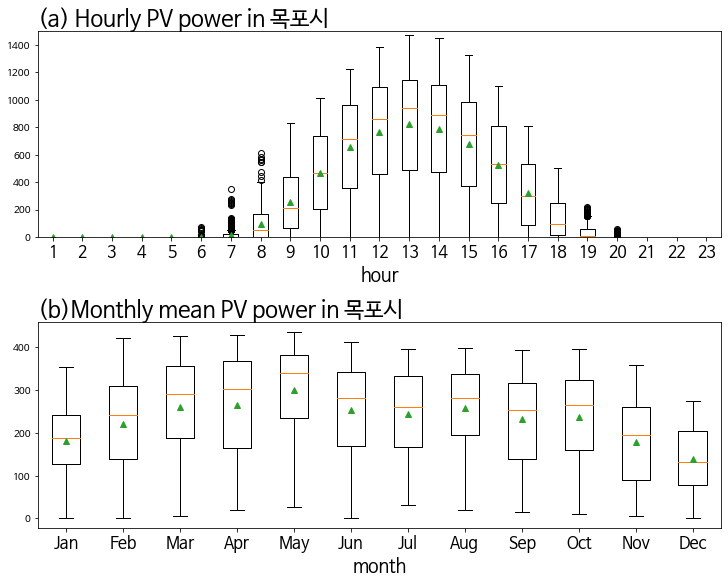

In [ ]:
PlotPVData(Sundata, '전남 목포시', ax1_ylim=[0, 1500])

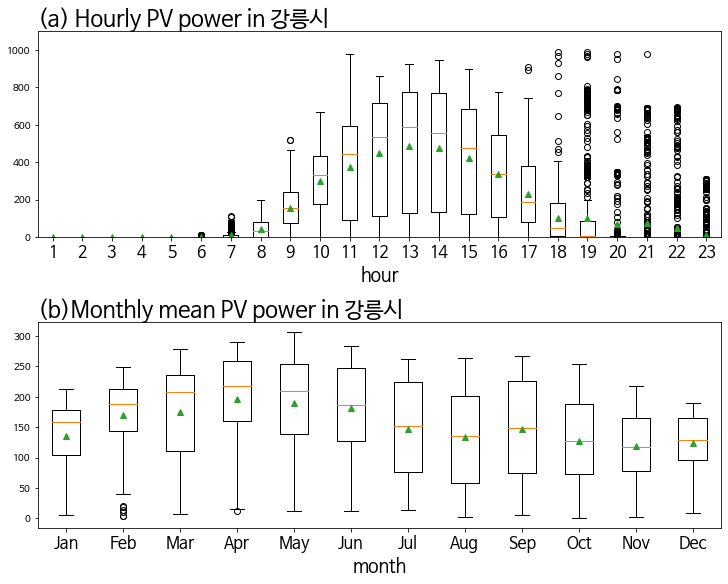

In [ ]:
PlotPVData(Sundata,'강원 강릉시', ax1_ylim=[0, 1100])

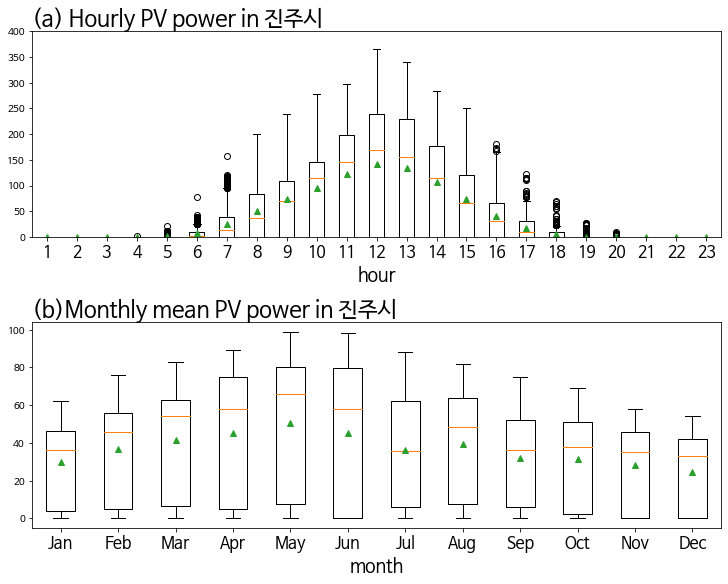

In [ ]:
PlotPVData(Sundata,'경남 진주시', ax1_ylim=[0,400])

# Save

In [ ]:
Map_df.to_csv('/content/gdrive/MyDrive/SolarPower/MappingDf.csv' , index=False)